# **Book Recommendation Dataset - Putri Sinta Dewi Sinaga**


## **Project Overview**

Buku adalah kumpulan/himpunan kertas atau lembaran yang tertulis atau mengandung tulisan. Setiap sisi dari sebuah lembaran kertas pada buku disebut sebuah halaman.Seiring dengan perkembangan dalam bidang dunia informatika, kini dikenal pula istilah e-book atau buku-e (buku elektronik) yang mengandalkan perangkat seperti komputer meja, komputer jinjing, komputer tablet, telepon seluler dan lainnya, serta menggunakan perangkat lunak tertentu untuk membacanya. Ada beberapa contoh buku yang membuat penikmat buku bingung akan buku yang ingin dibacanya. Dalam hal ini, sistem rekomendasi menjadi salah satu cara untuk memberi saran kepada penikmat buku tersebut.

# **Data Understanding**

Data yang digunakan untuk projek kali ini yaitu Book Recommendation Dataset yang diunduh dari kaggle. (https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Books.csv).

file yang terdapat pada dataset diatas adalah sebagai berikut:



*   Books.csv
*   Rating.cvs
*   users.cvs





## **Download dataset from Kaggle**

In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putrisinaga","key":"6c78d4e13fc440dcd954727a7df8589a"}'}

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


## **Data Loading**

In [ ]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d arashnic/book-recommendation-dataset

 46% 11.0M/23.8M [00:00<00:00, 113MB/s]
100% 23.8M/23.8M [00:00<00:00, 168MB/s]


In [ ]:
# unzip
!mkdir book-recommendation-dataset.zip
!unzip book-recommendation-dataset.zip -d book-recommendation-dataset
!ls book-recommendation-dataset

mkdir: cannot create directory ‘book-recommendation-dataset.zip’: File exists
Archive:  book-recommendation-dataset.zip
  inflating: book-recommendation-dataset/Books.csv  
  inflating: book-recommendation-dataset/Ratings.csv  
  inflating: book-recommendation-dataset/Users.csv  
  inflating: book-recommendation-dataset/recsys_taxonomy2.png  
Books.csv  Ratings.csv	recsys_taxonomy2.png  Users.csv


## **Import library**

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from zipfile import ZipFile
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
# memuat file ke dalam variable
Books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")
Ratings = pd.read_csv("/content/book-recommendation-dataset/Ratings.csv")
Users = pd.read_csv("/content/book-recommendation-dataset/Users.csv")


<ipython-input-7-d7e8f4e01e22>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv("/content/book-recommendation-dataset/Books.csv")


In [ ]:
# menampilkan jumlah shape pada masing-masing file

print("Books Shape:", Books.shape)
print("Users Shape:", Users.shape)
print("Ratings Shape:", Ratings.shape)

Books Shape: (271360, 8)
Users Shape: (278858, 3)
Ratings Shape: (1149780, 3)


## **Exploratory Data Analysis**

suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi.

### **Unvariate EDA**

Pada data loading, telah dideklarasikan variabel yang akan dipakai. Variable tersebut diantaranya :


1.   Books : Buku diidentifikasi dengan ISBN masing-masing. 
2.   Ratings : Berisi informasi penilaian buku
3.   Users : Berisi pengguna.





tahap eksplorasi dilakukan untuk memahami variable serta menemukan korelasi antar variable.

### **Books Variable**

In [ ]:
Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
#Cek informasi dari data Books
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan hasil diatas terdapat empat variable diantaranya



*   Book Title : Judul Buku ada 271360
*   Book Author : Penulis Buku ada 271359
*   Year Of Publication : Tahun Penerbitan ada 271360
*   Publisher : Penerbit ada 271358
*   Image-URL-S: merupakan sampul gambar dari buku yang berukuran kecil dengan tipe data object
*   Image-URL-M: merupakan sampul gambar dari buku yang berukuran sedang dengan tipe data object
*   Image-URL-L: merupakan sampul gambar dari buku yang berukuran besar dengan tipe data object




In [ ]:
print('Banyak Buku :', len(Books))

Banyak Buku : 271360


In [ ]:
data_books = Books.iloc[:12000]
print('Jumlah Buku yang di gunakan :', len(data_books))

Jumlah Buku yang di gunakan : 12000


### **Users Variable**

In [ ]:
Users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
#Cek informasi dari data Users
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berdasarkan hasil diatas terdapat empat variable diantaranya



*   User-ID : Pengguna ID ada 278858
*   Location : Lokasi ada 278858
*   Age  : Usia ada 168096

In [ ]:
print('Banyak Pengguna :', len(Users))

Banyak Pengguna : 278858


In [ ]:
data_users = Users.iloc[:12000]
print('Jumlah pengguna yang di gunakan :', len(data_users))

Jumlah pengguna yang di gunakan : 12000


### **Ratings Variable**

In [ ]:
Ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
#Cek informasi dari data Ratings
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan hasil diatas terdapat satu variable diantaranya

*   User-ID : Pengguna ID ada 1149780

In [ ]:
print('Banyak Rating :', len(Ratings))

Banyak Rating : 1149780


In [ ]:
data_rating = Ratings.iloc[:12000]
print('Jumlah pengguna yang di gunakan :', len(data_rating))

Jumlah pengguna yang di gunakan : 12000


## **Data Preparation**

Data preparation bertujuan untuk menyiapkan data sebelum masuk ke proses modeling. Selain itu, data preparation juga berguna untuk meningkatkan akurasi saat training data. Pada dataset ini, yang akan kita lakukan yaitu menggabungkan dataset dengan fungsi merge() dan key ISBN, menghapus missing value serta menurut dataset berdasarkan ISBN serta menghapus hasil duplikat.

### **Books Variable**

In [ ]:
data_books.rename(columns = {'Book-Title':'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Publication'},inplace = True)
data_books

<ipython-input-21-5b268e92b5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books.rename(columns = {'Book-Title':'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Publication'},inplace = True)


,ISBN,Book_Title,Book_Author,Year_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
11995,0030291798,Business Marketing Management: A Strategic Vie...,Michael D. Hutt,2000,South-Western College Pub,http://images.amazon.com/images/P/0030291798.0...,http://images.amazon.com/images/P/0030291798.0...,http://images.amazon.com/images/P/0030291798.0...
11996,0060959541,From This Day Forward,Cokie Roberts,2001,Perennial,http://images.amazon.com/images/P/0060959541.0...,http://images.amazon.com/images/P/0060959541.0...,http://images.amazon.com/images/P/0060959541.0...
11997,0812967224,The Day I Turned Uncool: Confessions of a Relu...,Dan Zevin,2002,Villard Books,http://images.amazon.com/images/P/0812967224.0...,http://images.amazon.com/images/P/0812967224.0...,http://images.amazon.com/images/P/0812967224.0...
11998,0374250995,Rivonia's Children: Three Families and the Cos...,Glenn Frankel,1999,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0374250995.0...,http://images.amazon.com/images/P/0374250995.0...,http://images.amazon.com/images/P/0374250995.0...


In [ ]:
data_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L' ], axis=1, inplace=True)
data_books

<ipython-input-22-fe4d62f2e2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L' ], axis=1, inplace=True)


,ISBN,Book_Title,Book_Author,Year_Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
11995,0030291798,Business Marketing Management: A Strategic Vie...,Michael D. Hutt,2000,South-Western College Pub
11996,0060959541,From This Day Forward,Cokie Roberts,2001,Perennial
11997,0812967224,The Day I Turned Uncool: Confessions of a Relu...,Dan Zevin,2002,Villard Books
11998,0374250995,Rivonia's Children: Three Families and the Cos...,Glenn Frankel,1999,Farrar Straus &amp; Giroux


Menghapus beberapa kolom image yang tidak terlalu digunakan, yaitu :

1.  Image-URL-S : gambar dari buku yang berukuran kecil
2.  Image-URL-M : gambar dari buku yang berukuran sedang
3.  Image-URL-L : gambar dari buku yang berukuran besar

In [ ]:
data_books['Year_Publication'] = pd.to_numeric(data_books['Year_Publication'], errors='coerce')

<ipython-input-23-18a19300f811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_books['Year_Publication'] = pd.to_numeric(data_books['Year_Publication'], errors='coerce')


In [ ]:
data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISBN              12000 non-null  object
 1   Book_Title        12000 non-null  object
 2   Book_Author       12000 non-null  object
 3   Year_Publication  12000 non-null  int64 
 4   Publisher         12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


### **Ratings Variable**

In [ ]:
data_rating.rename(columns = {'User-ID':'UserID', 'Book-Rating': 'Book_Rating'},inplace = True)
data_rating

<ipython-input-25-c8118fac485b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rating.rename(columns = {'User-ID':'UserID', 'Book-Rating': 'Book_Rating'},inplace = True)


,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
11995,929,067163884X,7
11996,929,0671667815,0
11997,929,067168390X,0
11998,929,0671868691,0


### **Users Variable**

In [ ]:
data_users.rename(columns = {'User-ID':'UserID',},inplace = True)
data_users

<ipython-input-26-a086ba295121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users.rename(columns = {'User-ID':'UserID',},inplace = True)


,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
11995,11996,"montmorot, berlin, france",19.0
11996,11997,"lathuile, n/a, france",NaN
11997,11998,"heidelberg, baden-wuerttemberg, germany",NaN
11998,11999,"matthews, north carolina, usa",NaN


In [ ]:
data_users.drop(['Age'], axis=1, inplace=True)
data_users

<ipython-input-27-d358bcd3a144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_users.drop(['Age'], axis=1, inplace=True)


,UserID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
11995,11996,"montmorot, berlin, france"
11996,11997,"lathuile, n/a, france"
11997,11998,"heidelberg, baden-wuerttemberg, germany"
11998,11999,"matthews, north carolina, usa"


In [ ]:
print('Jumlah Buku berdasarkan Rating : ', len(data_rating.ISBN.unique()))
print('Jumlah Buku berdasarkan Daftar Buku : ', len(data_books.ISBN.unique()))
print('Jumlah Pengguna berdasarkan ID PEngguna : ', len(data_users.UserID.unique()))

Jumlah Buku berdasarkan Rating :  10945
Jumlah Buku berdasarkan Daftar Buku :  12000
Jumlah Pengguna berdasarkan ID PEngguna :  12000


Menggabungkan 'data_books' dan 'data_rating' dengan menggunakan fungsi merge

In [ ]:
data_train = data_rating.merge(data_books, left_on = 'ISBN', right_on = 'ISBN')
data_train

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
2,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
...,...,...,...,...,...,...,...
3336,929,0553801031,9,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED,2002,Bantam
3337,929,0590457225,0,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede,1992,Scholastic
3338,929,067163884X,7,THIS HALLOWED GRND,Bruce Catton,1986,Pocket
3339,929,067168390X,0,Lonesome Dove,Larry McMurtry,1988,Pocket


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 3340
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            3341 non-null   int64 
 1   ISBN              3341 non-null   object
 2   Book_Rating       3341 non-null   int64 
 3   Book_Title        3341 non-null   object
 4   Book_Author       3341 non-null   object
 5   Year_Publication  3341 non-null   int64 
 6   Publisher         3341 non-null   object
dtypes: int64(3), object(4)
memory usage: 208.8+ KB


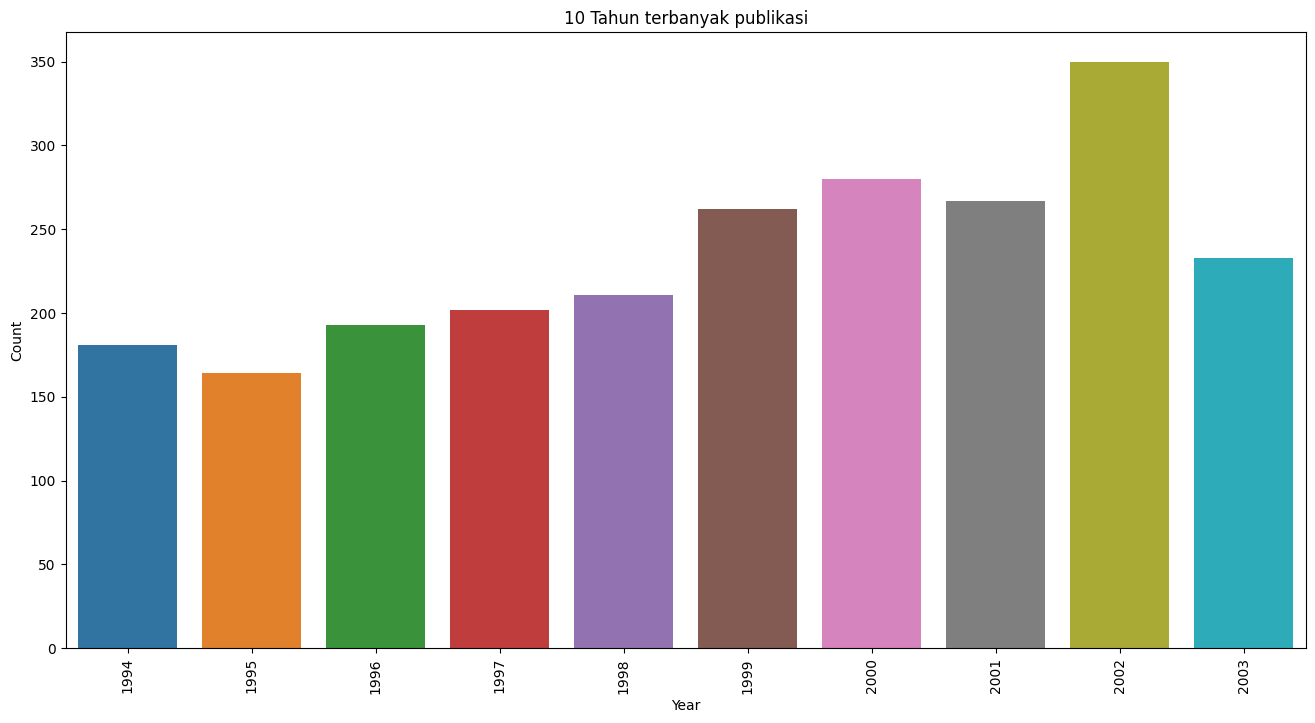

In [ ]:
year=data_train['Year_Publication'].value_counts()[0:10]
plt.figure(figsize=(16,8))
plt.title("10 Tahun terbanyak publikasi")
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Menggabungkan 'data_user' dan 'data_rating' dengan menggunakan fungsi merge

In [ ]:
data_using = data_rating.merge(data_users, left_on = 'UserID', right_on = 'UserID')
data_using

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
2,8,0002005018,5,"timmins, ontario, canada"
3,8,0060973129,0,"timmins, ontario, canada"
4,8,0374157065,0,"timmins, ontario, canada"
...,...,...,...,...
2434,929,067163884X,7,"king of prussia, ,"
2435,929,0671667815,0,"king of prussia, ,"
2436,929,067168390X,0,"king of prussia, ,"
2437,929,0671868691,0,"king of prussia, ,"


In [ ]:
data_using.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 0 to 2438
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserID       2439 non-null   int64 
 1   ISBN         2439 non-null   object
 2   Book_Rating  2439 non-null   int64 
 3   Location     2439 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.3+ KB


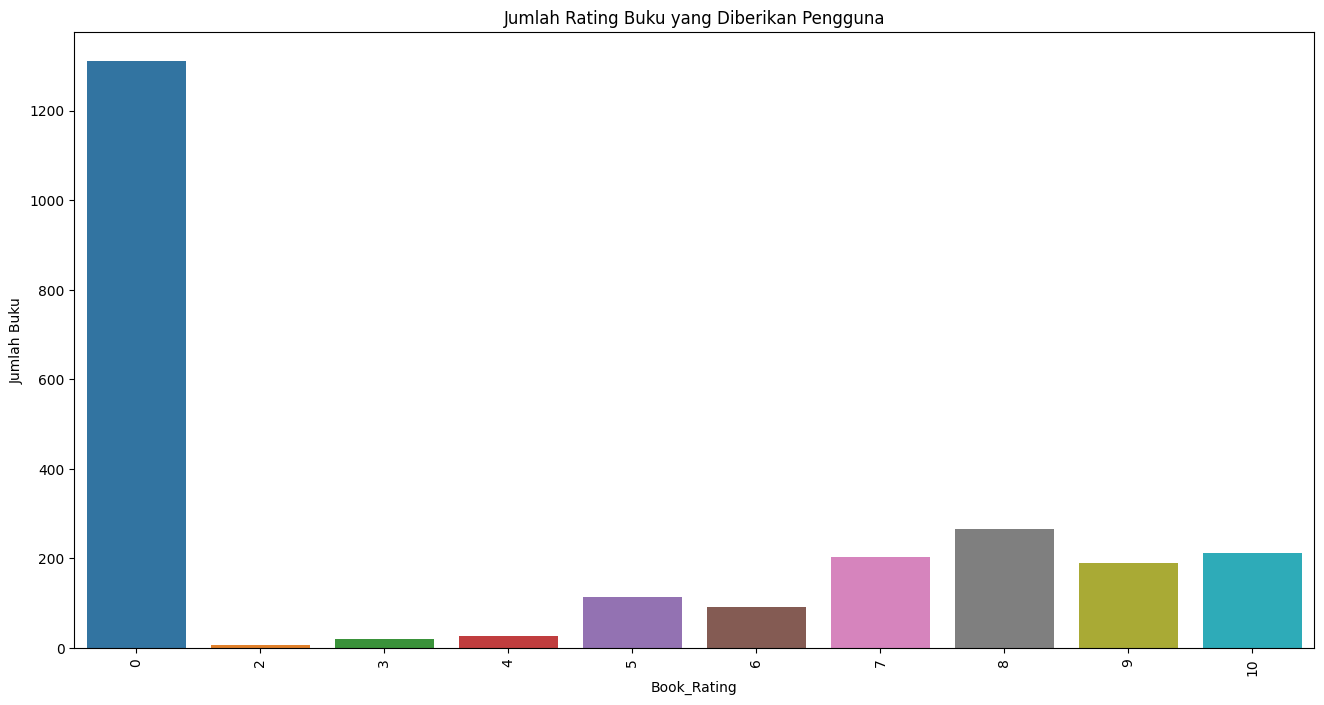

In [ ]:
rating_counter=data_using['Book_Rating'].value_counts()[0:10]
plt.figure(figsize=(16,8))
plt.title("Jumlah Rating Buku yang Diberikan Pengguna")
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Book_Rating')
plt.ylabel('Jumlah Buku')
plt.show()

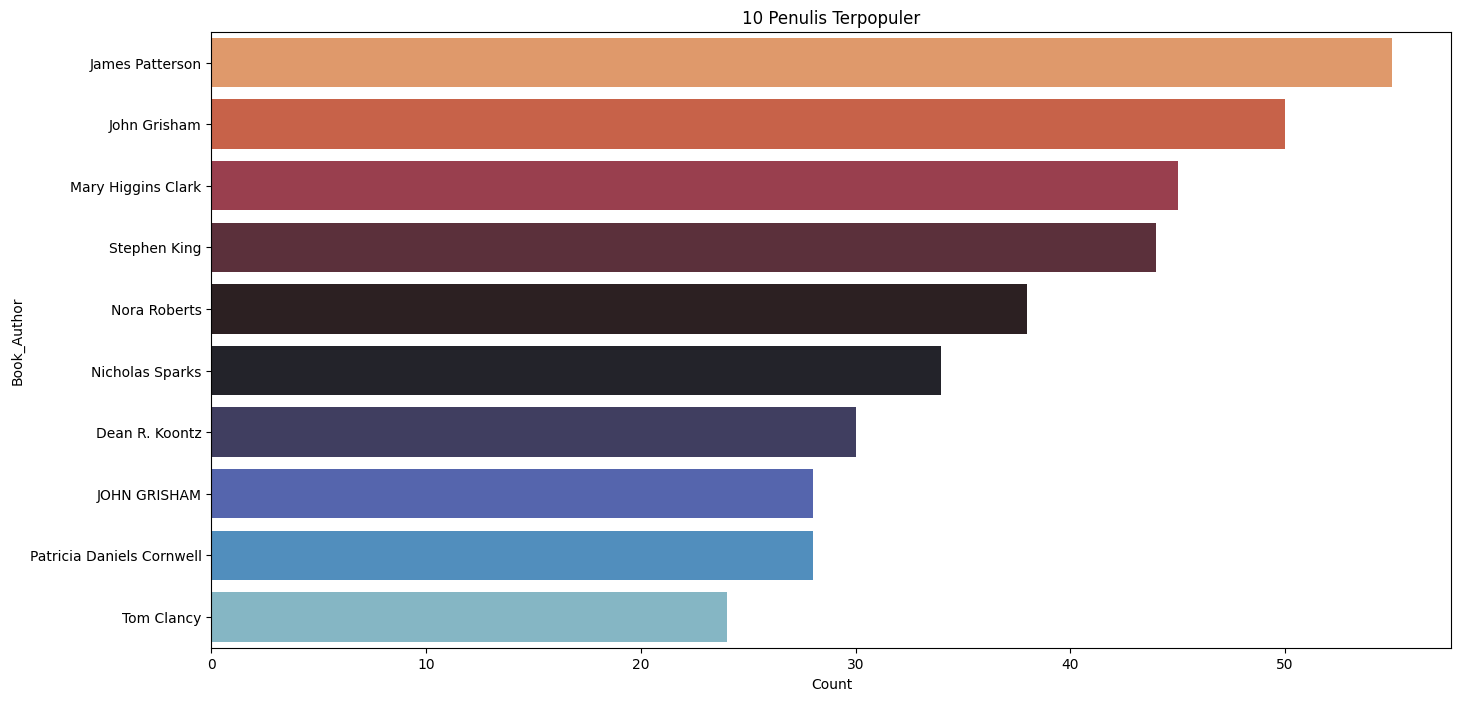

In [ ]:
most_author = data_train.Book_Author.value_counts().reset_index()
most_author.columns = ['Book_Author','count']

plt.figure(figsize = (16,8))
plt.title("10 Penulis Terpopuler")
sns.barplot(x = 'count', y = 'Book_Author', data = most_author.head(10), palette='icefire_r');
plt.ylabel('Book_Author')
plt.xlabel('Count')
plt.show()

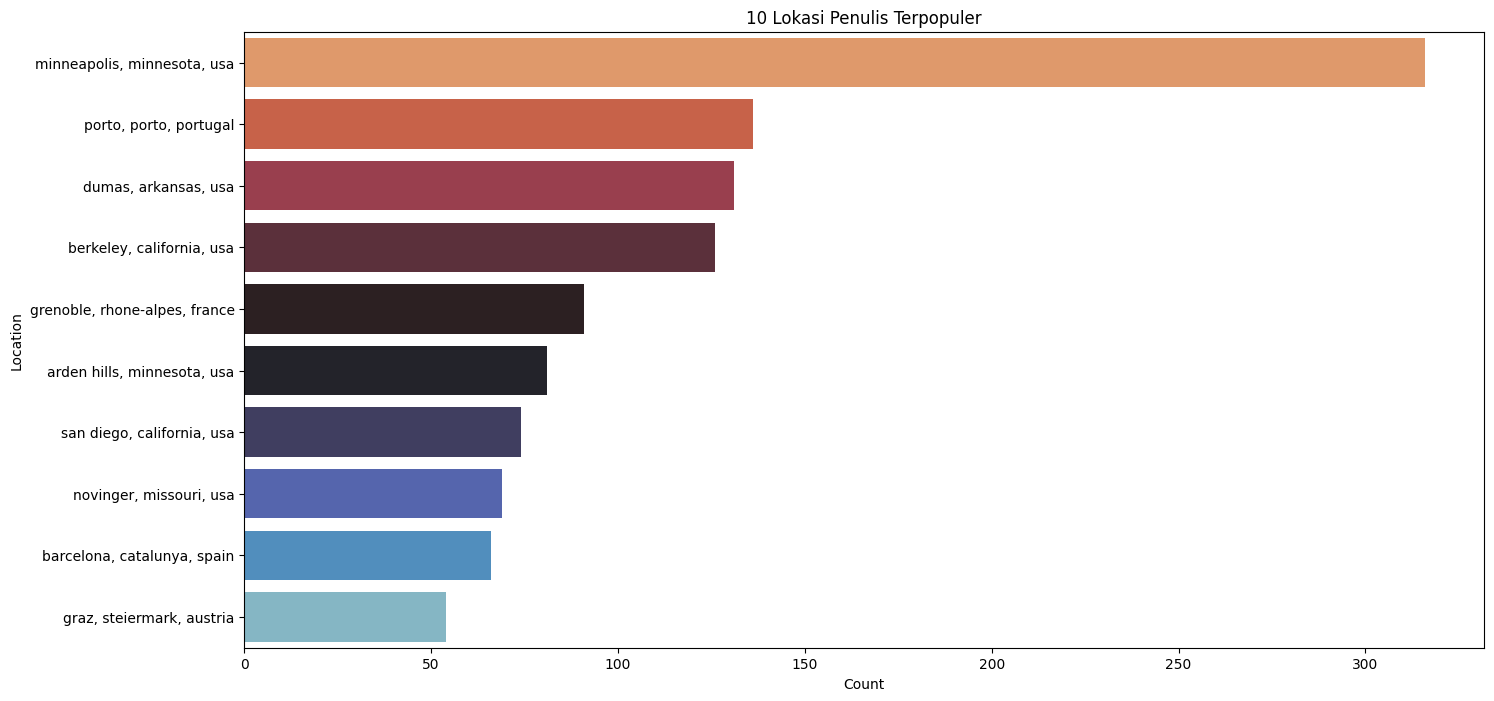

In [ ]:
most_loc = data_using.Location.value_counts().reset_index()
most_loc.columns = ['Location','count']

plt.figure(figsize = (16,8))
plt.title("10 Lokasi Penulis Terpopuler")
sns.barplot(x = 'count', y = 'Location', data = most_loc.head(10), palette='icefire_r');
plt.ylabel('Location')
plt.xlabel('Count')
plt.show()

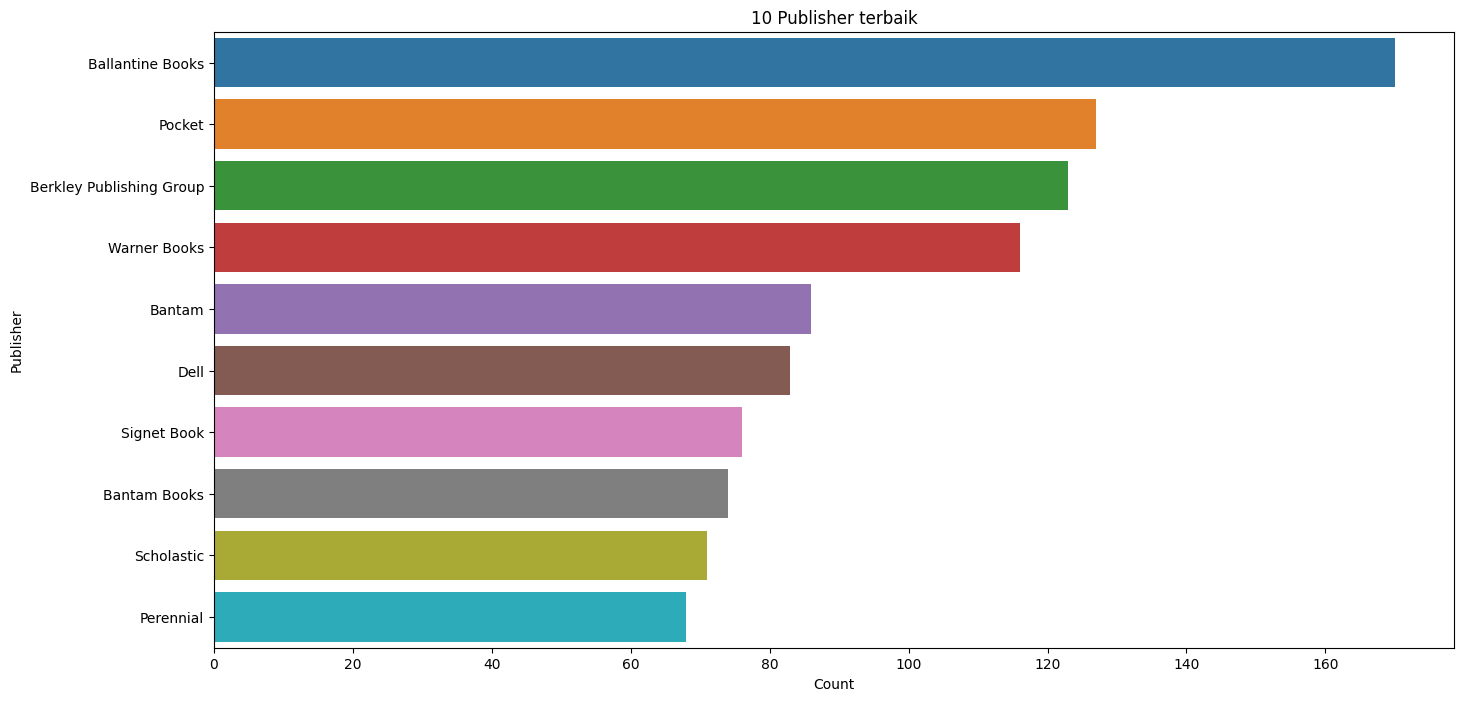

In [ ]:
most_publis = data_train.Publisher.value_counts().reset_index()
most_publis.columns = ['Publisher','count']

plt.figure(figsize = (16,8))
plt.title("10 Publisher terbaik")
sns.barplot(x = 'count', y = 'Publisher', data = most_publis.head(10));
plt.ylabel('Publisher')
plt.xlabel('Count')
plt.show()

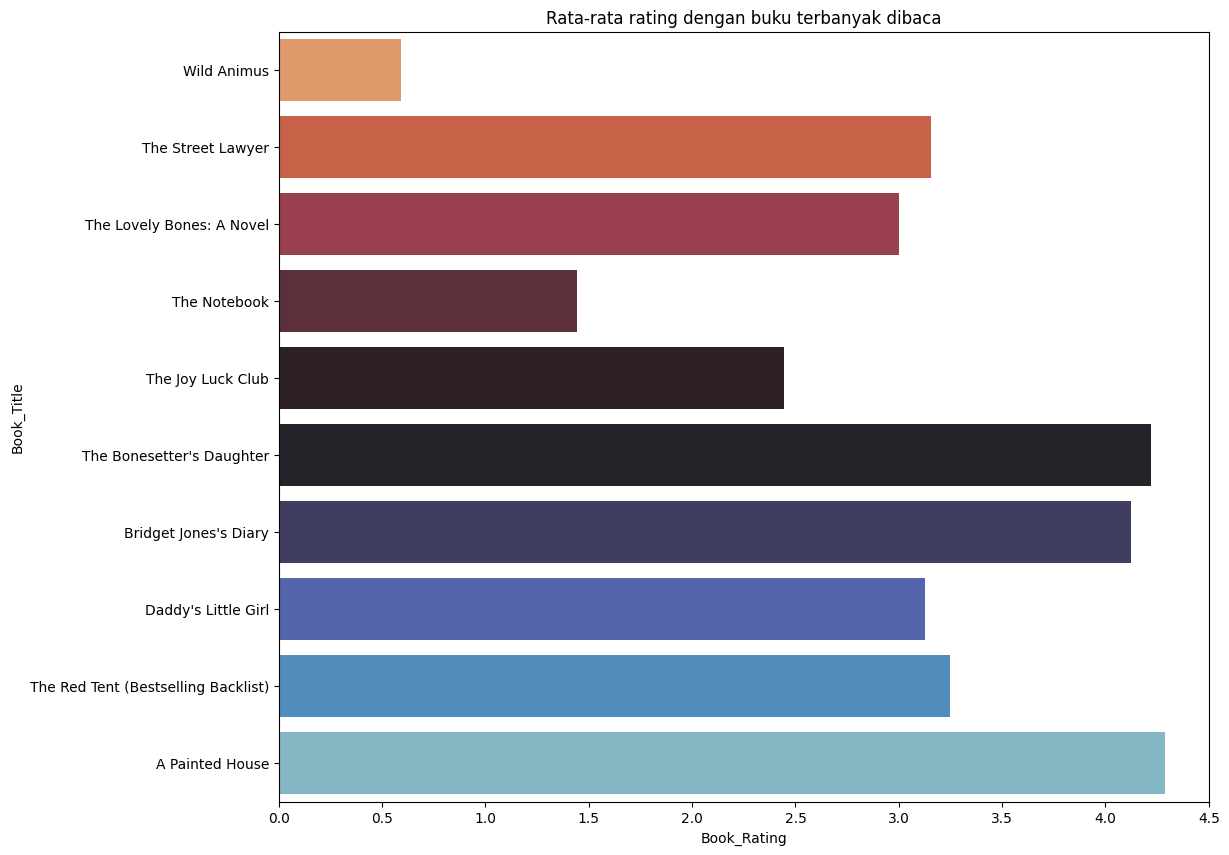

In [ ]:
data_aver = data_train.groupby('Book_Title', as_index=False)['Book_Rating'].mean()
temp = data_train.Book_Title.value_counts().reset_index()
temp.columns = ['Book_Title','count']
most_rated_by_reads = pd.merge(data_aver,temp,on='Book_Title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Rata-rata rating dengan buku terbanyak dibaca")
sns.barplot(x = 'Book_Rating', y = 'Book_Title', data = most_rated_by_reads.head(10), palette='icefire_r');

## **Data Cleaning**

proses mendeteksi dan mengoreksi (atau menghapus) catatan yang rusak atau tidak akurat dari kumpulan catatan, tabel, atau basis data dan mengacu pada pengidentifikasian bagian data yang tidak lengkap, salah, tidak akurat atau tidak relevan dan kemudian mengganti, memodifikasi, atau menghapus data kotor atau kasar.

In [ ]:
# check missing values
(data_books.isnull() | data_books.empty | data_books.isna()).sum()

ISBN                0
Book_Title          0
Book_Author         0
Year_Publication    0
Publisher           0
dtype: int64

In [ ]:
# check missing values
(data_rating.isnull() | data_rating.empty | data_rating.isna()).sum()

UserID         0
ISBN           0
Book_Rating    0
dtype: int64

In [ ]:
# check missing values
(data_users.isnull() | data_users.empty | data_users.isna()).sum()

UserID      0
Location    0
dtype: int64

In [ ]:
# check missing values
(data_train.isnull() | data_train.empty | data_train.isna()).sum()

UserID              0
ISBN                0
Book_Rating         0
Book_Title          0
Book_Author         0
Year_Publication    0
Publisher           0
dtype: int64

In [ ]:
# check missing values
(data_using.isnull() | data_using.empty | data_using.isna()).sum()

UserID         0
ISBN           0
Book_Rating    0
Location       0
dtype: int64

In [ ]:
data_prep = data_train
data_prep.sort_values('ISBN')

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
2126,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2245,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page,1999,Trafalgar Square
3279,901,0006276199,0,Alien at St Wilfred's,Adrian Plass,1999,Zondervan
3280,901,000649840X,9,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk
2878,643,0007100221,7,TERROR FIRMA,Matthew Thomas,2001,Trafalgar Square
...,...,...,...,...,...,...,...
908,277509,9724115380,9,A hora de SertÃ³rio (Finisterra),JoÃ£o Aguiar,1994,EdiÃ§Ãµes ASA
2228,160,9724119378,0,O Deus Das Pequenas Coisas,Roy,1998,Edicoes Asa
524,277272,9726101794,4,As mulheres deviam vir com livro de instruÃ§Ãµ...,Manuel Jorge Marmelo,1999,Campo das Letras
177,276925,9871138016,0,Cronica De Una Muerte Anunciada,Gabriel Marques Garcia,2002,Debols!llo


In [ ]:
data_prep = data_prep.drop_duplicates('ISBN')
data_prep

,UserID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
6,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
...,...,...,...,...,...,...,...
3336,929,0553801031,9,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED,2002,Bantam
3337,929,0590457225,0,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede,1992,Scholastic
3338,929,067163884X,7,THIS HALLOWED GRND,Bruce Catton,1986,Pocket
3339,929,067168390X,0,Lonesome Dove,Larry McMurtry,1988,Pocket


In [ ]:
data_prus = data_using
data_prus.sort_values('UserID')

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
19,8,1881320189,7,"timmins, ontario, canada"
18,8,1575663937,6,"timmins, ontario, canada"
16,8,1558746218,0,"timmins, ontario, canada"
...,...,...,...,...
2408,929,0385314744,7,"king of prussia, ,"
2409,929,0394312066,8,"king of prussia, ,"
2410,929,0425050750,8,"king of prussia, ,"
2399,929,0345297687,0,"king of prussia, ,"


In [ ]:
data_prus = data_prus.drop_duplicates('UserID')
data_prus

,UserID,ISBN,Book_Rating,Location
0,2,0195153448,0,"stockton, california, usa"
1,7,034542252,0,"washington, dc, usa"
2,8,0002005018,5,"timmins, ontario, canada"
20,9,0440234743,0,"germantown, tennessee, usa"
23,10,1841721522,0,"albacete, wisconsin, spain"
...,...,...,...,...
2385,916,0140273980,10,"brisbane, queensland, australia"
2386,919,848966983X,10,"madrid, madrid, spain"
2387,921,2070372294,3,"osnabrück, niedersachsen, germany"
2388,924,2264030542,8,"grenoble, isere, france"


In [ ]:
# Mengonversi data series 'ISBN’ menjadi dalam bentuk list
books_id = data_prep['ISBN'].tolist()
 
# Mengonversi data series ‘Title’ menjadi dalam bentuk list
books_title = data_prep['Book_Title'].tolist()
 
# Mengonversi data series ‘Author’ menjadi dalam bentuk list
books_author = data_prep['Book_Author'].tolist()
 
print('Jumlah ID Buku : ', len(books_id))
print('Jumlah Judul Buku : ', len(books_title))
print('Jumlah Penulis Buku : ', len(books_author))

Jumlah ID Buku :  2519
Jumlah Judul Buku :  2519
Jumlah Penulis Buku :  2519


In [ ]:
# Membuat dictionary untuk data ‘books_id’, ‘books_title’, dan ‘books_author’
books_new = pd.DataFrame({
    'id': books_id,
    'title':books_title,
    'author': books_author
})
books_new

,id,title,author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0446520802,The Notebook,Nicholas Sparks
2,038550120X,A Painted House,JOHN GRISHAM
3,0425115801,Lightning,Dean R. Koontz
4,0449006522,Manhattan Hunt Club,JOHN SAUL
...,...,...,...
2514,0553801031,The New Rabbi : A Congregation Searches for It...,STEPHEN FRIED
2515,0590457225,Dealing With Dragons (Enchanted Forest Chronic...,Patricia C. Wrede
2516,067163884X,THIS HALLOWED GRND,Bruce Catton
2517,067168390X,Lonesome Dove,Larry McMurtry


In [ ]:
df = data_rating
df

,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
11995,929,067163884X,7
11996,929,0671667815,0
11997,929,067168390X,0
11998,929,0671868691,0


In [ ]:
# Mengubah UserID menjadi list tanpa nilai yang sama
user_ids = df['UserID'].unique().tolist()
print('list UserID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded UserID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke UserID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke UserID: ', user_encoded_to_user)

list UserID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
 
#Selanjutnya, petakan userID dan ISBN ke dataframe yang berkaitan.
 
# Mapping userID ke dataframe user
df['user'] = df['UserID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)

<ipython-input-61-9a5c3e712df3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['UserID'].map(user_to_user_encoded)
<ipython-input-61-9a5c3e712df3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book'] = df['ISBN'].map(book_to_book_encoded)


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah book
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['Book_Rating'] = df['Book_Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book_Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book_Rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1164
10945
Number of User: 1164, Number of Resto: 10945, Min Rating: 0.0, Max Rating: 10.0


<ipython-input-62-b66aaca27ce9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Book_Rating'] = df['Book_Rating'].values.astype(np.float32)


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,UserID,ISBN,Book_Rating,user,book
1935,277427,156865037X,7.0,255,1881
6494,278418,0446360406,0.0,678,6118
1720,277427,0553297422,0.0,255,1676
9120,278582,0140277471,9.0,749,8616
360,276875,883041915X,0.0,65,356
...,...,...,...,...,...
11964,929,0345331605,7.0,1163,10917
5191,278418,0373074050,0.0,678,4870
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 90% data train dan 20% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1881]
 [ 678 6118]
 [ 255 1676]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.7 0.  0.  ... 0.  0.5 0. ]


## **Data Modelling**

proses untuk menjalankan algoritma Machine Learning untuk mengolah dataset yang sudah dibagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola atau output tertentu. Pada tahap ini saya menggunakan model collaborative filtering dimana menggunakan metode deep learning yang bertujuan menghasilkan rekomendasi buku.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
169/169 [==============================] - 12s 32ms/step - loss: 0.6760 - root_mean_squared_error: 0.4430 - val_loss: 0.6563 - val_root_mean_squared_error: 0.4347
Epoch 2/100
169/169 [==============================] - 2s 12ms/step - loss: 0.5073 - root_mean_squared_error: 0.3460 - val_loss: 0.6391 - val_root_mean_squared_error: 0.4249
Epoch 3/100
169/169 [==============================] - 3s 19ms/step - loss: 0.4946 - root_mean_squared_error: 0.3395 - val_loss: 0.6217 - val_root_mean_squared_error: 0.4147
Epoch 4/100
169/169 [==============================] - 4s 22ms/step - loss: 0.4817 - root_mean_squared_error: 0.3331 - val_loss: 0.6045 - val_root_mean_squared_error: 0.4046
Epoch 5/100
169/169 [==============================] - 2s 14ms/step - loss: 0.4693 - root_mean_squared_error: 0.3260 - val_loss: 0.5869 - val_root_mean_squared_error: 0.3941
Epoch 6/100
169/169 [==============================] - 1s 5ms/step - loss: 0.4579 - root_mean_squared_error: 0.3199 - val_loss: 0

## **Evaluasi**

### **Metrik Root Mean Squared Error (RMSE)**

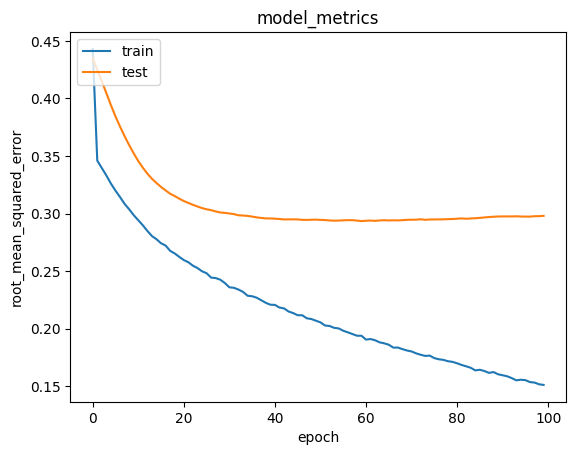

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Sistem Collaborative Filtering**

In [ ]:
book_df = books_new
 
# Mengambil sample user
user_id = df.UserID.sample(1).iloc[0]
book_visited_by_user = df[df.UserID == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_visited = book_df[~book_df['id'].isin(book_visited_by_user.ISBN.values)]['id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

### **Hasil Sistem Rekomendasi Collaborative Filtering**

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Menampilkan Rekomendasi Untuk Pengguna: {}'.format(user_id))
print('===' * 9)
print('Buku dengan peringkat tinggi dari pengguna')
print('----' * 8)
 
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 8)
print('10 Rekomendasi Buku Teratas')
print('----' * 8)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

77/77 [==============================] - 0s 3ms/step
Menampilkan Rekomendasi Untuk Pengguna: 882
Buku dengan peringkat tinggi dari pengguna
--------------------------------
The Da Vinci Code : Dan Brown
--------------------------------
10 Rekomendasi Buku Teratas
--------------------------------
Little Altars Everywhere : Rebecca Wells
The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS
To Kill a Mockingbird : Harper Lee
She's Come Undone (Oprah's Book Club) : Wally Lamb
The Secret Life of Bees : Sue Monk Kidd
Rebecca : Daphne Du Maurier
Chasing the Dime : Michael Connelly
This Year It Will Be Different: And Other Stories : Maeve Binchy
The Bonesetter's Daughter : Amy Tan
The Phantom Tollbooth : Norton Juster


### **Mean Squared Error (MSE)**

In [ ]:
print("MSE dari pada data train = ", mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3)
print("MSE dari pada data validation = ", mean_squared_error(y_true=y_val, y_pred=model.predict(x_val))/1e3)

338/338 [==============================] - 1s 3ms/step
MSE dari pada data train =  2.134168001215646e-05
38/38 [==============================] - 0s 3ms/step
MSE dari pada data validation =  8.878335751528855e-05
